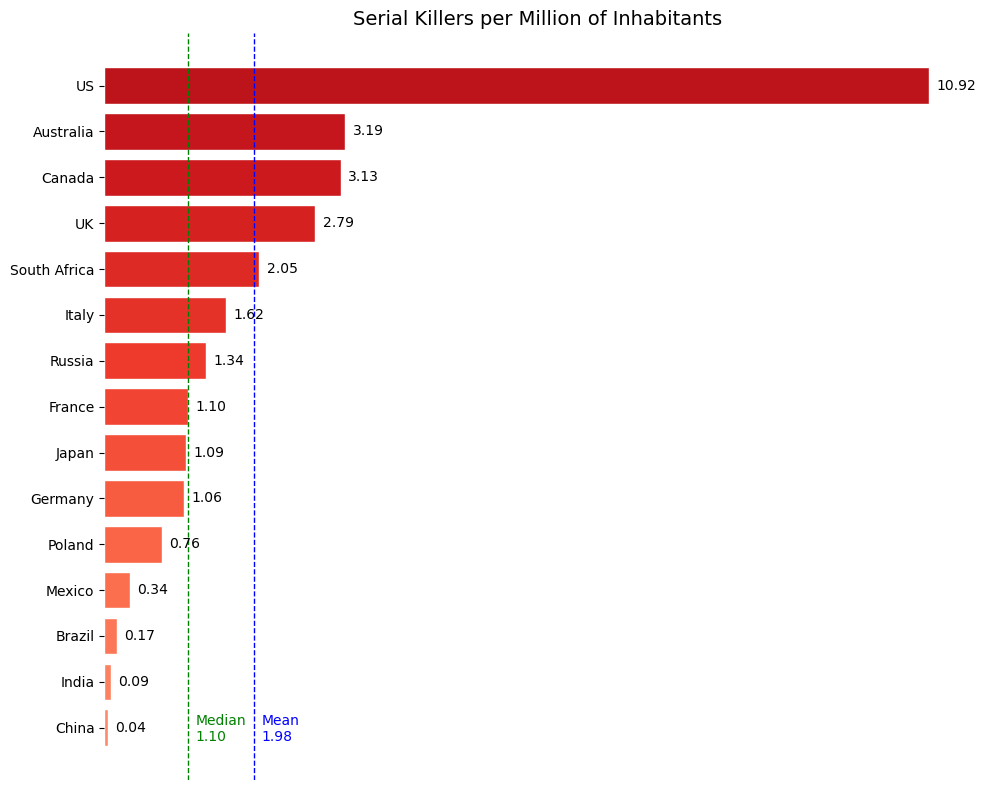

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Data: Serial killers by country (absolute) and population (in millions)
data = {
    "Country": [
        "US", "Russia", "UK", "Japan", "South Africa", "India", "Canada",
        "Italy", "Germany", "Australia", "France", "China", "Mexico", "Brazil", "Poland"
    ],
    "Serial_Killers": [
        3615, 196, 190, 137, 123, 121, 119,
        97, 88, 83, 74, 64, 43, 36, 29
    ],
    "Population_Millions": [
        331, 146, 68, 126, 60, 1391, 38,
        60, 83, 26, 67, 1444, 127, 214, 38
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Calculate serial killers per million inhabitants
df["Killers_Per_Million"] = df["Serial_Killers"] / df["Population_Millions"]

# Sort by Killers_Per_Million for better visualization
df = df.sort_values(by="Killers_Per_Million", ascending=False)

# Plot the improved horizontal visualization with adjusted mean/median labels
plt.figure(figsize=(10, 8))

# Invert the gradient color: dark red for high values, light red for low
bars = plt.barh(
    df["Country"], df["Killers_Per_Million"],
    color=plt.cm.Reds(np.linspace(0.8, 0.4, len(df))), edgecolor="white"
)

# Add mean and median reference lines
mean_value = df["Killers_Per_Million"].mean()
median_value = df["Killers_Per_Million"].median()

plt.axvline(mean_value, color="blue", linestyle="--", linewidth=1, label="Mean")
plt.axvline(median_value, color="green", linestyle="--", linewidth=1, label="Median")

# Add mean and median labels, offset to avoid intersecting the lines
plt.text(mean_value + 0.1, len(df) - 0.7, f"Mean\n{mean_value:.2f}", color="blue", fontsize=10, ha="left")
plt.text(median_value + 0.1, len(df) - 0.7, f"Median\n{median_value:.2f}", color="green", fontsize=10, ha="left")

# Simplify title
plt.title("Serial Killers per Million of Inhabitants", fontsize=14)

# Add sorted labels
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.1, bar.get_y() + bar.get_height() / 2, f"{width:.2f}", va="center", fontsize=10)

# Remove chart box, x-axis, and y-axis label
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.gca().yaxis.label.set_visible(False)

# Add legend
# plt.legend()

# Tidy layout
plt.gca().invert_yaxis()  # Invert y-axis for readability
plt.tight_layout()
# Save the chart as pdf
plt.savefig("serial_killers_per_million.pdf")
# Display the chart
plt.show()
